In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import warnings

warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("Downloads/brain_stroke.csv")

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
df.shape

(4981, 11)

In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [8]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


In [12]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [13]:
#Data Cleaning

sorted(df['age'].unique().tolist())[:11]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72, 0.8, 0.88]

In [14]:
df['age'] = np.ceil(df['age'])

In [15]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
#Exploratory Data Analysis

stroke_count = df['stroke'].value_counts()

In [17]:
stroke_count

stroke
0    4733
1     248
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x177bd708090>,
 [Text(-1.0865708998339851, 0.17135833692576546, 'No'),
  Text(1.086570903844916, -0.17135831149273842, 'Yes')])

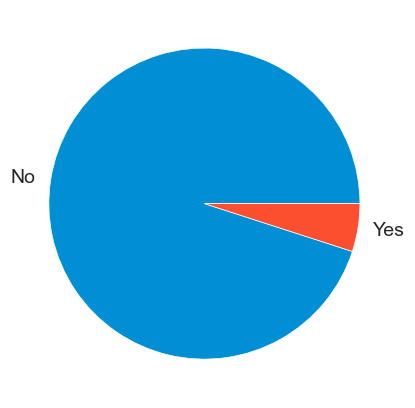

In [18]:
plt.pie(x = stroke_count.values, labels = ['No', 'Yes'])

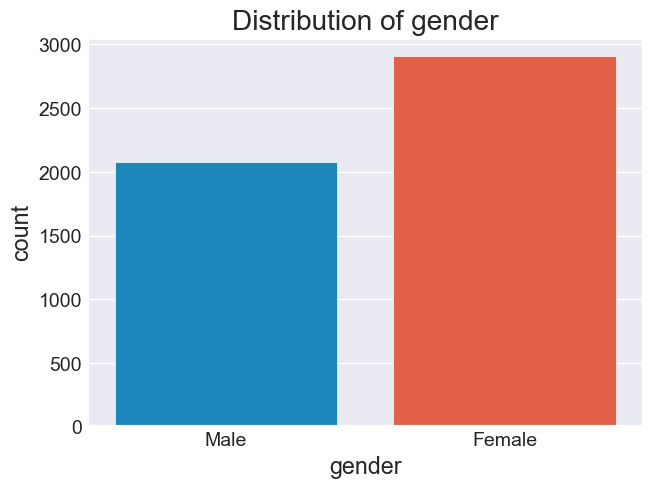

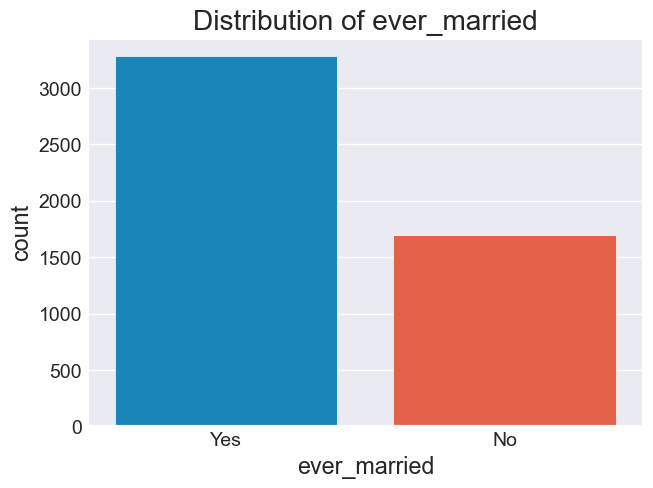

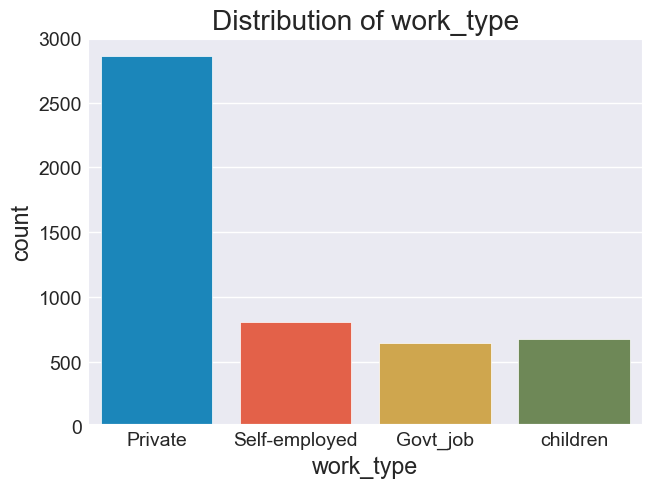

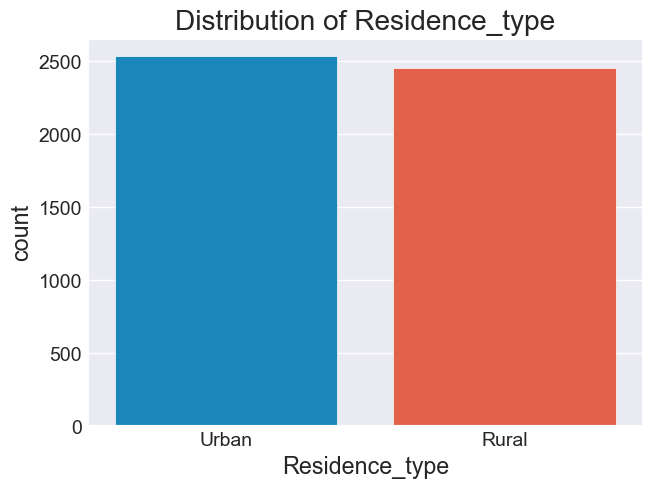

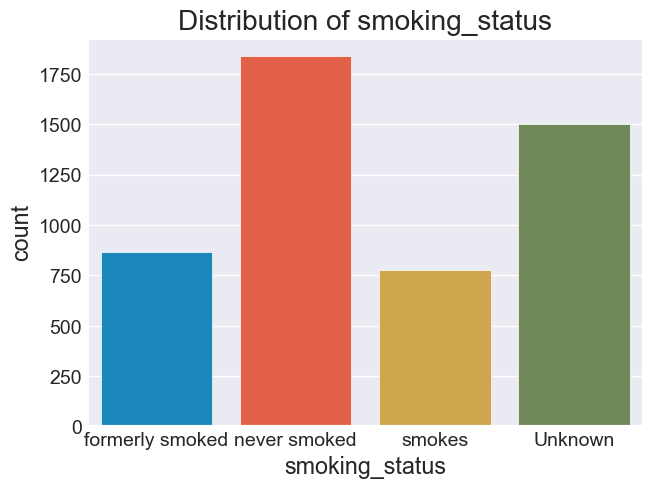

In [19]:
for cols in df.select_dtypes(include = "object").columns:
    sns.countplot(df, x = cols)
    plt.title(f"Distribution of {cols}")
    plt.show()  

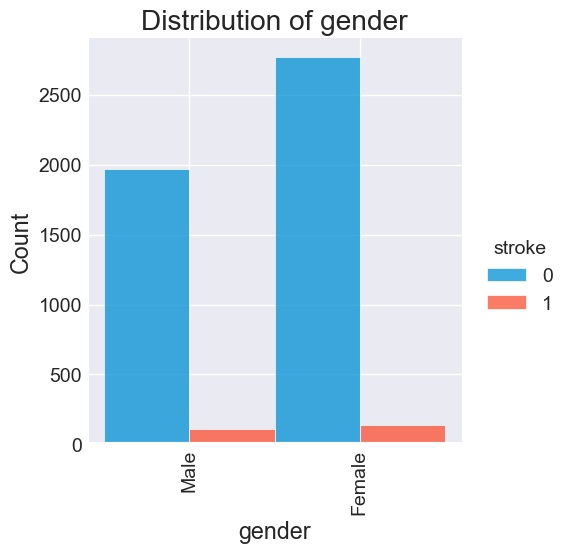

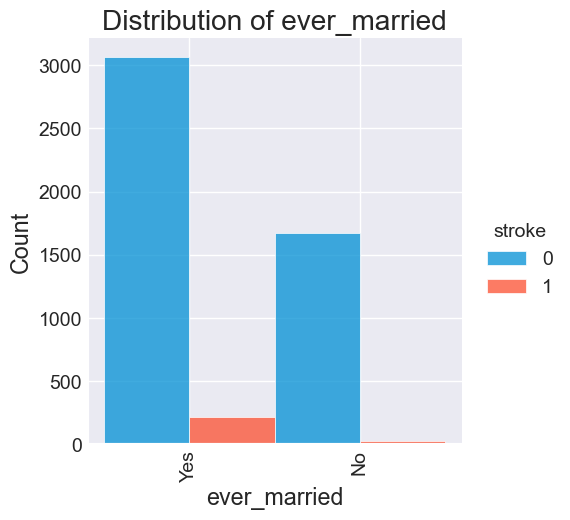

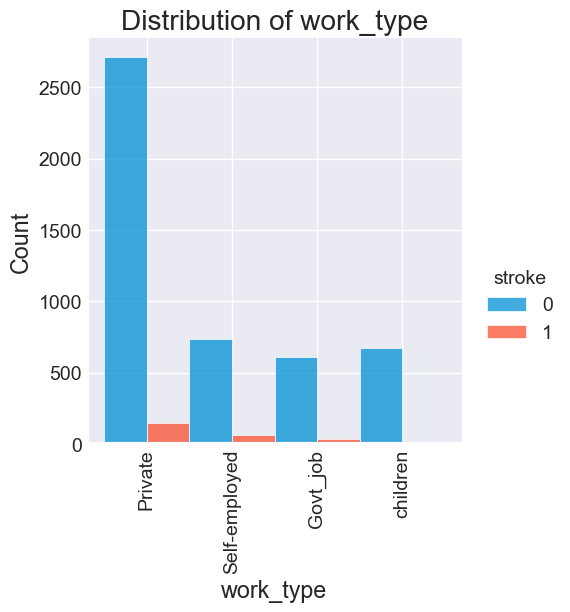

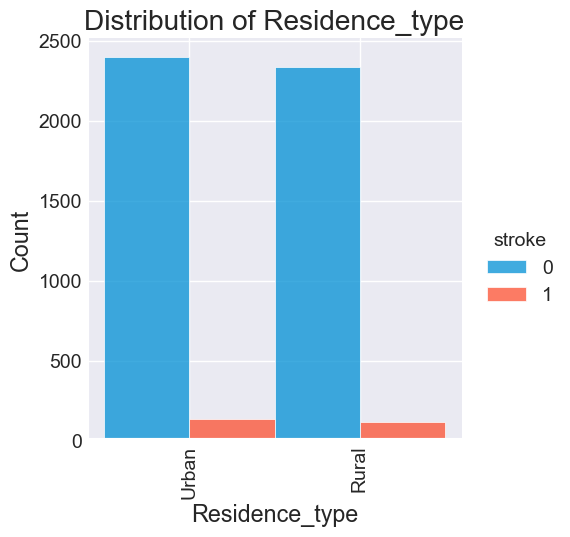

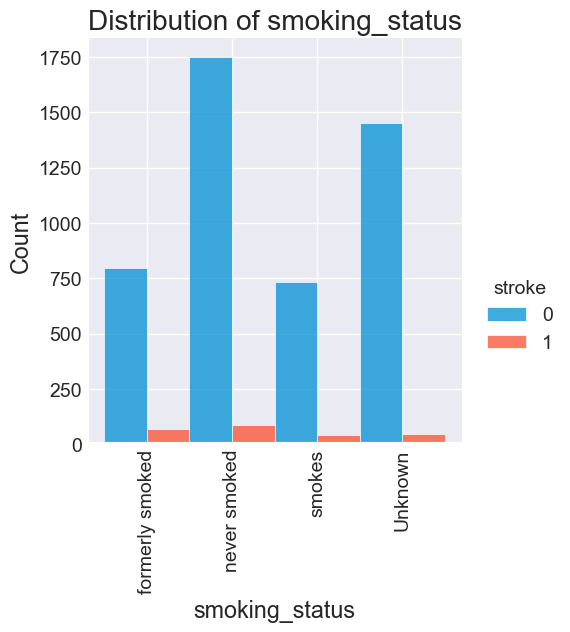

In [20]:
for cols in df.select_dtypes(include = "object").columns:
    sns.displot(df, x = cols,hue = df['stroke'], multiple = "dodge")
    plt.title(f"Distribution of {cols}")
    plt.xticks(rotation=90)
    plt.show()  

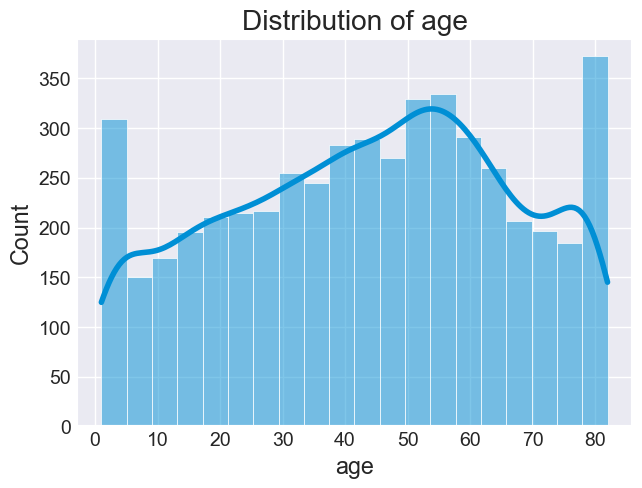

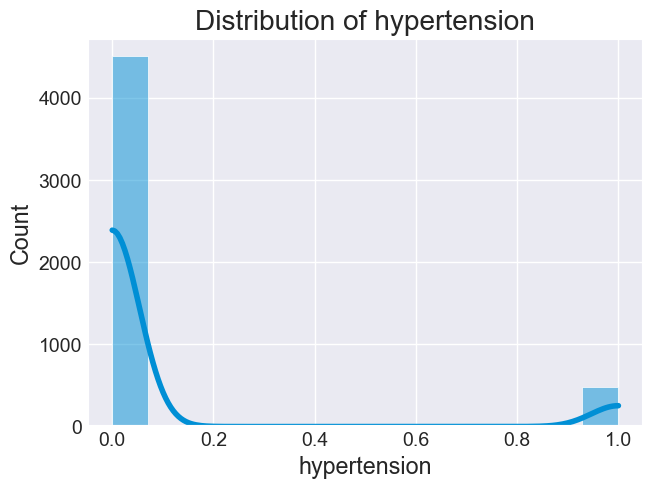

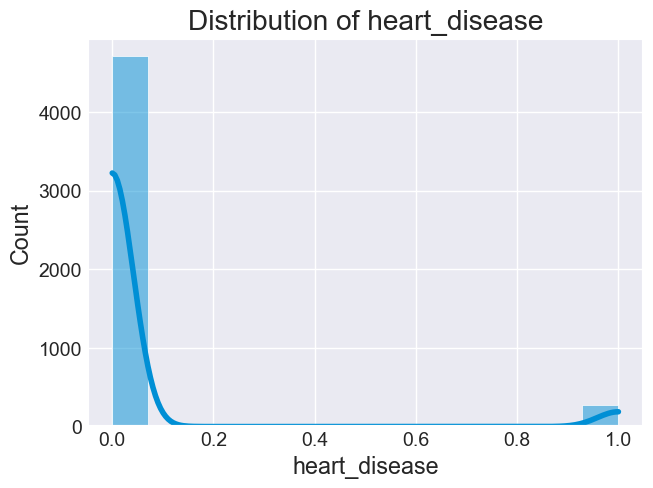

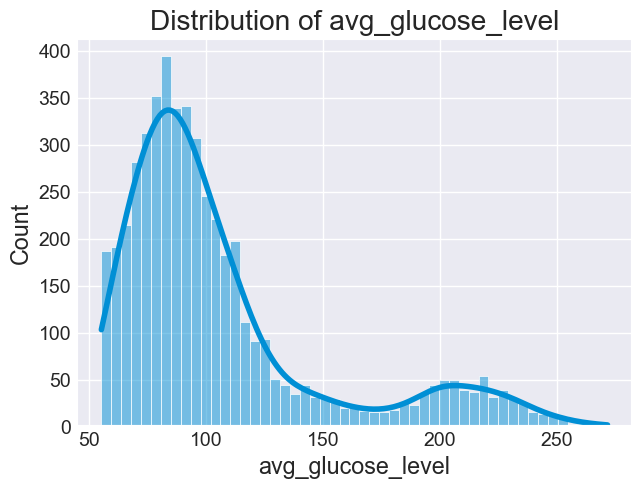

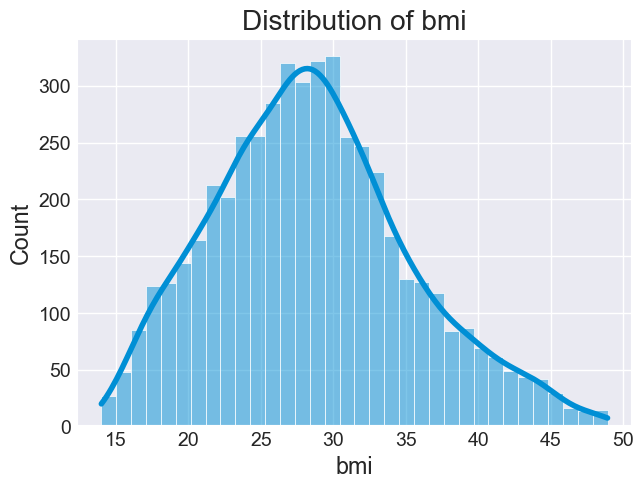

In [21]:
for cols in df.select_dtypes(exclude = "object").columns[:-1]:
    sns.histplot(df, x=cols, kde=True)
    plt.title(f"Distribution of {cols}")
    plt.show()  

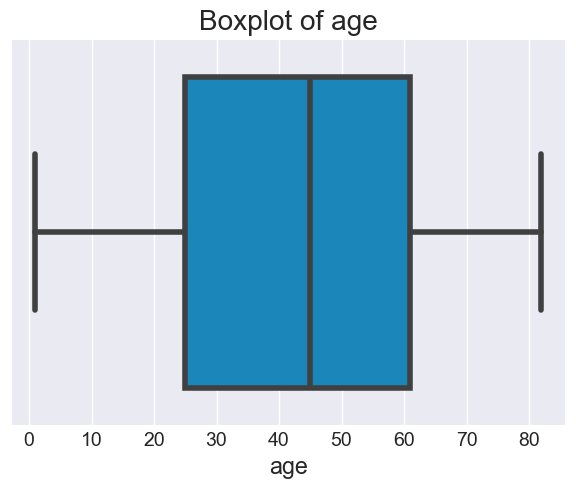

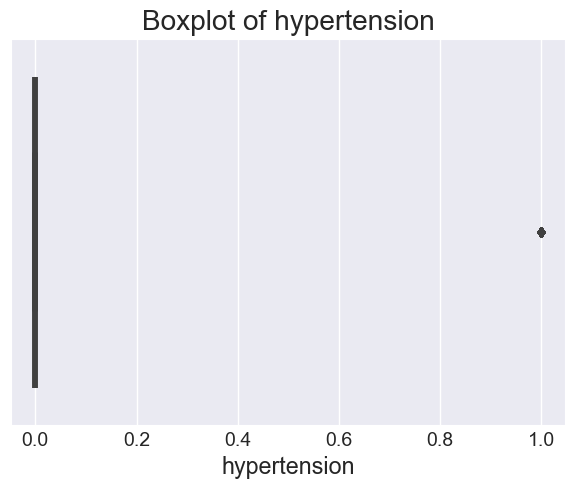

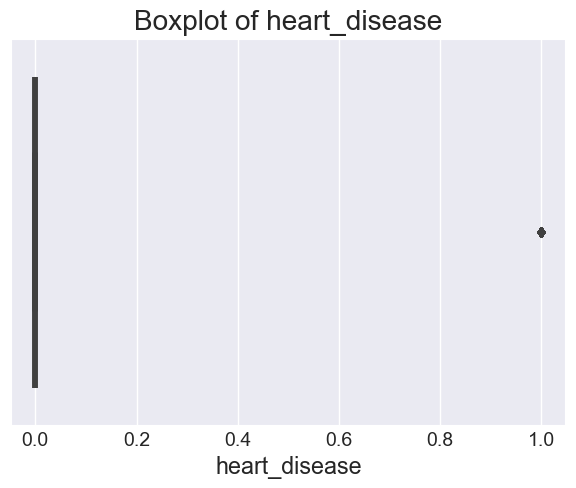

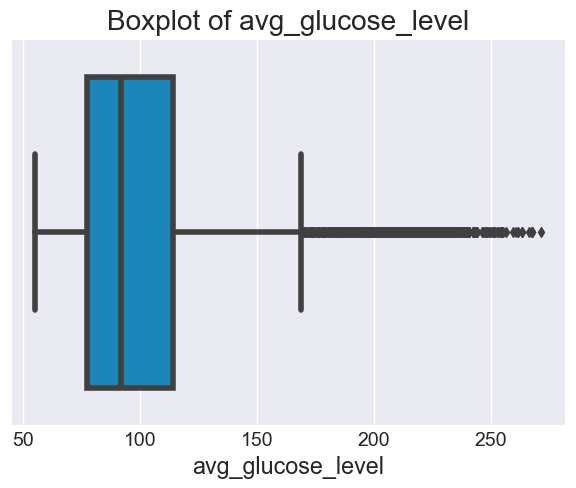

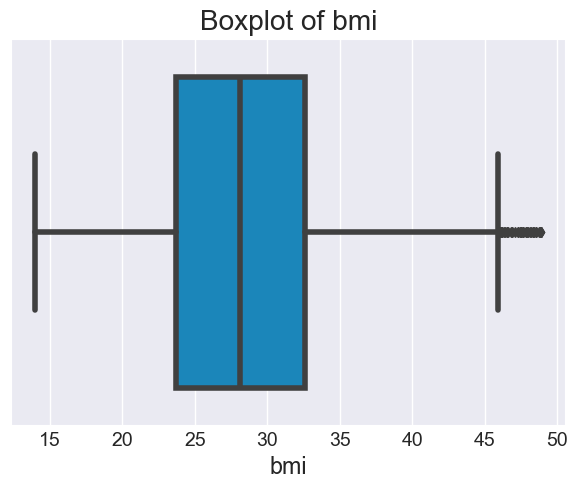

In [22]:
for cols in df.select_dtypes(exclude = "object").columns[:-1]:
    sns.boxplot(df, x=cols)
    plt.title(f"Boxplot of {cols}")
    plt.show()  

In [23]:
# Data Preparation and Preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(display = 'diagram')

In [24]:
input_cols = list(df.columns[:-1])
target_col = 'stroke'

In [25]:
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [26]:
df_inputs = df[input_cols].copy()
df_target = df[target_col].copy()

In [27]:
numerical_cols = df.select_dtypes(include = np.number).columns[:-1].to_list()

In [28]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [29]:
categorical_cols = df.select_dtypes(exclude = np.number).columns.to_list()

In [30]:
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [31]:
categorical_cols.remove('smoking_status')

In [32]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [33]:
ordinal_enc = OrdinalEncoder(categories = [['Unknown', 'never smoked', 'formerly smoked', 'smokes']])

In [34]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [35]:
preprocessor = ColumnTransformer([
    ('Ordinal_Encode', ordinal_enc, ['smoking_status']),
    ('Onehot_Encode', onehot_enc, categorical_cols)
])

In [36]:
preprocessor.fit_transform(df_inputs)

array([[2., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [3., 1., 0., ..., 0., 0., 1.],
       ...,
       [3., 1., 0., ..., 0., 1., 0.],
       [3., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [37]:
encoded_cols = list(preprocessor.get_feature_names_out())

In [38]:
encoded_cols

['Ordinal_Encode__smoking_status',
 'Onehot_Encode__gender_Female',
 'Onehot_Encode__gender_Male',
 'Onehot_Encode__ever_married_No',
 'Onehot_Encode__ever_married_Yes',
 'Onehot_Encode__work_type_Govt_job',
 'Onehot_Encode__work_type_Private',
 'Onehot_Encode__work_type_Self-employed',
 'Onehot_Encode__work_type_children',
 'Onehot_Encode__Residence_type_Rural',
 'Onehot_Encode__Residence_type_Urban']

In [39]:
df_inputs[encoded_cols] = preprocessor.transform(df_inputs)

In [40]:
new_df = df_inputs[numerical_cols + encoded_cols]

In [41]:
new_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,Onehot_Encode__gender_Female,Onehot_Encode__gender_Male,Onehot_Encode__ever_married_No,Onehot_Encode__ever_married_Yes,Onehot_Encode__work_type_Govt_job,Onehot_Encode__work_type_Private,Onehot_Encode__work_type_Self-employed,Onehot_Encode__work_type_children,Onehot_Encode__Residence_type_Rural,Onehot_Encode__Residence_type_Urban
0,67.0,0,1,228.69,36.6,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,80.0,0,1,105.92,32.5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,49.0,0,0,171.23,34.4,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,79.0,1,0,174.12,24.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,81.0,0,0,186.21,29.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [42]:
X = new_df
y = df['stroke']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [45]:
X_train.shape

(3984, 16)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [101]:
models = [
    (LogisticRegression(), 'LogisticRegression'),
    (DecisionTreeClassifier(), 'DecisionTreeClassifier'),
    (RandomForestClassifier(), 'RandomForestClassifier'),
    (LGBMClassifier(verbose = 1), 'LGBMClassifier'),
    (XGBClassifier(), 'XGBClassifier')
]

In [103]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    confusion_mat = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return confusion_mat, accuracy, precision, recall, f1

In [105]:
confusion_mats = {}

def metric_df(model, model_name):
    confusion_mat, *df = evaluate_model(model, X_train, y_train, X_test, y_test)
    confusion_mats[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data = df, columns=['Accuracy', 'Precision', 'Recall', 'F1'])
    model_metrics.insert(0, 'Model', model_name)

    return model_metrics

In [110]:
predictions = []

for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

[LightGBM] [Info] Number of positive: 194, number of negative: 3790
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 3984, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048695 -> initscore=-2.972263
[LightGBM] [Info] Start training from score -2.972263


In [112]:
predictions

[                Model  Accuracy  Precision  Recall   F1
 0  LogisticRegression  0.945838        0.0     0.0  0.0,
                     Model  Accuracy  Precision    Recall        F1
 0  DecisionTreeClassifier  0.920762   0.272727  0.277778  0.275229,
                     Model  Accuracy  Precision  Recall   F1
 0  RandomForestClassifier  0.941825        0.0     0.0  0.0,
             Model  Accuracy  Precision    Recall        F1
 0  LGBMClassifier  0.939819      0.125  0.018519  0.032258,
            Model  Accuracy  Precision    Recall        F1
 0  XGBClassifier  0.940822   0.307692  0.074074  0.119403]

In [114]:
oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

In [118]:
X_train_ns.shape

(7580, 16)

In [122]:
lr_with_smote = LogisticRegression()
lr_with_smote.fit(X_train_ns, y_train_ns)
lr_with_smote_mat = metric_df(lr_with_smote, 'Logistic With Smote')
predictions.append(lr_with_smote_mat)

In [124]:
predictions

[                Model  Accuracy  Precision  Recall   F1
 0  LogisticRegression  0.945838        0.0     0.0  0.0,
                     Model  Accuracy  Precision    Recall        F1
 0  DecisionTreeClassifier  0.920762   0.272727  0.277778  0.275229,
                     Model  Accuracy  Precision  Recall   F1
 0  RandomForestClassifier  0.941825        0.0     0.0  0.0,
             Model  Accuracy  Precision    Recall        F1
 0  LGBMClassifier  0.939819      0.125  0.018519  0.032258,
            Model  Accuracy  Precision    Recall        F1
 0  XGBClassifier  0.940822   0.307692  0.074074  0.119403,
                  Model  Accuracy  Precision    Recall        F1
 0  Logistic With Smote  0.738215    0.11236  0.555556  0.186916]

In [128]:
for model_name, confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix for {model_name}')
    print(confusion_mat)
    print()

Confusion Matrix for LogisticRegression
[[943   0]
 [ 54   0]]

Confusion Matrix for DecisionTreeClassifier
[[903  40]
 [ 39  15]]

Confusion Matrix for RandomForestClassifier
[[939   4]
 [ 54   0]]

Confusion Matrix for LGBMClassifier
[[936   7]
 [ 53   1]]

Confusion Matrix for XGBClassifier
[[934   9]
 [ 50   4]]

Confusion Matrix for Logistic With Smote
[[706 237]
 [ 24  30]]



In [130]:
#Voting Classifier #Hard and Soft
from sklearn.ensemble import VotingClassifier

In [132]:
estimator = []
estimator.append(('LogisticRegression' ,LogisticRegression()))
estimator.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
estimator.append(('RandomForestClassifier', RandomForestClassifier()))
estimator.append(('LGBMClassifier', LGBMClassifier()))
estimator.append(('XGBClassifier', XGBClassifier()))

In [138]:
VC_hard = VotingClassifier(estimators=estimator, voting='hard')
VC_hard.fit(X_train, y_train)
VC_hard_mat = metric_df(VC_hard, 'VC_HARD')
predictions.append(VC_hard_mat)

[LightGBM] [Info] Number of positive: 194, number of negative: 3790
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 3984, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048695 -> initscore=-2.972263
[LightGBM] [Info] Start training from score -2.972263


In [140]:
VC_soft = VotingClassifier(estimators=estimator, voting='soft')
VC_soft.fit(X_train, y_train)
VC_soft_mat = metric_df(VC_soft, 'VC_SOFT')
predictions.append(VC_soft_mat)

[LightGBM] [Info] Number of positive: 194, number of negative: 3790
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 3984, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048695 -> initscore=-2.972263
[LightGBM] [Info] Start training from score -2.972263


In [142]:
VC_hard_mat

,Model,Accuracy,Precision,Recall,F1
0,VC_HARD,0.943831,0.25,0.018519,0.034483


In [144]:
VC_soft_mat

,Model,Accuracy,Precision,Recall,F1
0,VC_SOFT,0.943831,0.25,0.018519,0.034483


In [148]:
predictions_base = pd.concat(predictions, ignore_index=True, sort=False)
predictions_base = predictions_base.sort_values(by=['Recall'], ascending=False).style.hide(axis='index')

In [150]:
predictions_base

Model,Accuracy,Precision,Recall,F1
Logistic With Smote,0.738215,0.112360,0.555556,0.186916
DecisionTreeClassifier,0.920762,0.272727,0.277778,0.275229
XGBClassifier,0.940822,0.307692,0.074074,0.119403
LGBMClassifier,0.939819,0.125000,0.018519,0.032258
VC_HARD,0.943831,0.250000,0.018519,0.034483
VC_SOFT,0.943831,0.250000,0.018519,0.034483
LogisticRegression,0.945838,0.000000,0.000000,0.000000
RandomForestClassifier,0.941825,0.000000,0.000000,0.000000


In [152]:
models_to_plot = [
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'XGBClassifier',
    'LGBMClassifier',
    'Logistic With Smote',
    'VC_HARD',
    'VC_SOFT'  
]

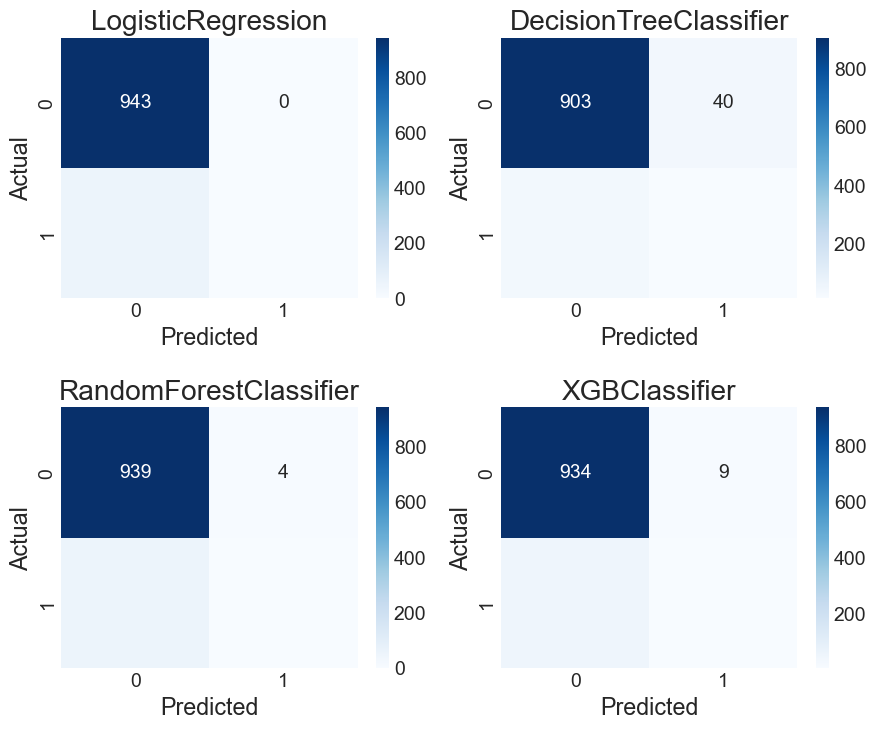

In [160]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
for ax, model_name in zip(axis.ravel(), models_to_plot):
    confusion_mat = confusion_mats[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(left=0, right=0.9, top=0.9, bottom=0)
plt.show()

In [162]:
#Make Predictions

single_input = {
    'gender': 'Male',
    'age': 33,
    'hypertension': 0,
    'heart_disease': 0,
    'ever_married': 'Yes',
    'work_type': 'Private',
    'Residence_type': 'Urban',
    'avg_glucose_level': 79.53,
    'bmi': 31.10,
    'smoking_status': 'formerly smoked'
}

In [164]:
input_df = pd.DataFrame([single_input])

In [166]:
input_df[encoded_cols] = preprocessor.transform(input_df)

In [168]:
X = input_df[numerical_cols + encoded_cols]

In [170]:
lr_with_smote.predict(X)

array([0], dtype=int64)

In [172]:
import joblib

In [174]:
model = {
    'encoded_cols': encoded_cols,
    'numerical_cols': numerical_cols,
    'preprocessor': preprocessor,
    'model': lr_with_smote
}

In [176]:
joblib.dump(model, 'model.joblib')

['model.joblib']